📂 Upload CSV file(s)...


Saving Weather Data.csv to Weather Data (5).csv
Columns: ['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather']

--- Weather Column Info ---
Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                 

/tmp/ipython-input-1867217953.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Event', data=top_events.head(10), palette='viridis')


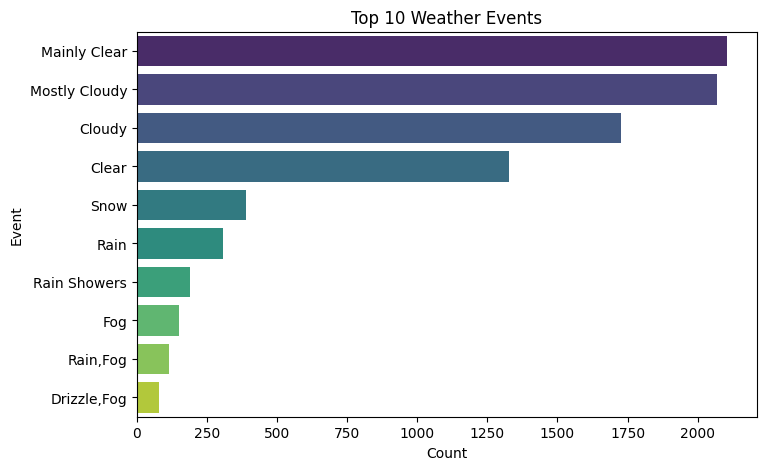


Top 3 features correlated with Event_Clear:
Press_kPa                          0.267707
Visibility_km                      0.083142
Event_Freezing Rain,Snow Grains   -0.004499
Name: Event_Clear, dtype: float64

Top 3 features correlated with Event_Cloudy:
Wind Speed_km/h           0.067317
Rel Hum_%                 0.063209
Event_Rain,Snow Grains   -0.005280
Name: Event_Cloudy, dtype: float64

Top 3 features correlated with Event_Drizzle:
Rel Hum_%           0.084243
Dew Point Temp_C    0.018561
Wind Speed_km/h     0.009081
Name: Event_Drizzle, dtype: float64

Top 3 features correlated with Event_Drizzle,Fog:
Rel Hum_%                 0.146449
Dew Point Temp_C          0.039454
Event_Rain,Snow Grains   -0.001023
Name: Event_Drizzle,Fog, dtype: float64

Top 3 features correlated with Event_Drizzle,Ice Pellets,Fog:
Rel Hum_%                                 0.015496
Wind Speed_km/h                           0.006208
Event_Thunderstorms,Heavy Rain Showers   -0.000114
Name: Event_Drizzle,I

/tmp/ipython-input-1867217953.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[yearly_counts.index.max(), 2025], y=[y[-1], pred_2025], palette='viridis')


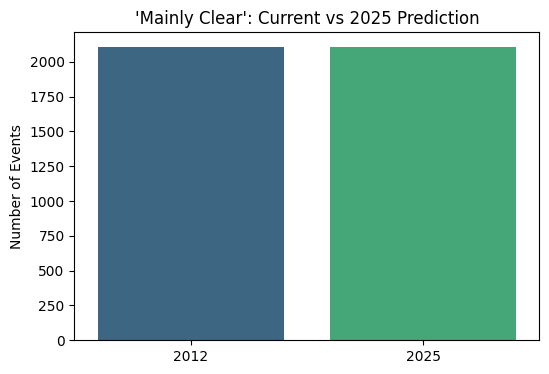


Predicted 'Mostly Cloudy' events in 2025: 2069


/tmp/ipython-input-1867217953.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[yearly_counts.index.max(), 2025], y=[y[-1], pred_2025], palette='viridis')


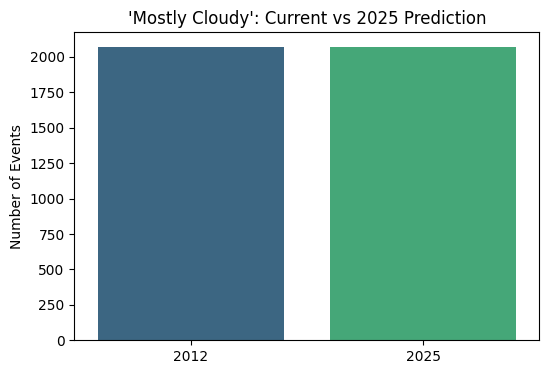


Predicted 'Cloudy' events in 2025: 1728


/tmp/ipython-input-1867217953.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[yearly_counts.index.max(), 2025], y=[y[-1], pred_2025], palette='viridis')


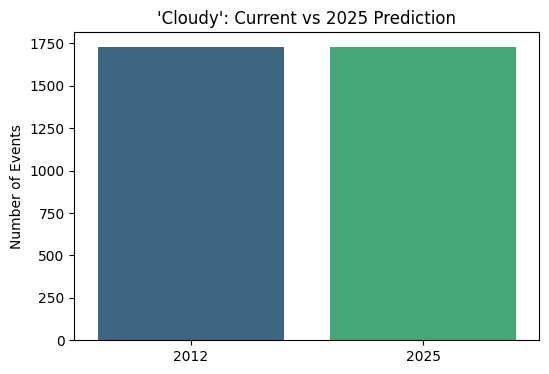


Predicted 'Clear' events in 2025: 1326


/tmp/ipython-input-1867217953.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[yearly_counts.index.max(), 2025], y=[y[-1], pred_2025], palette='viridis')


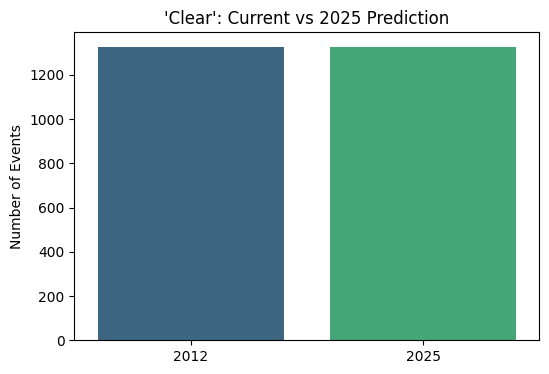


Predicted 'Snow' events in 2025: 390


/tmp/ipython-input-1867217953.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[yearly_counts.index.max(), 2025], y=[y[-1], pred_2025], palette='viridis')


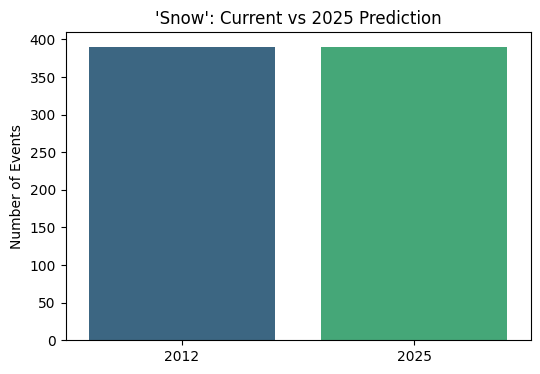


✅ Weather Events Analysis Complete!


In [9]:
# ==========================
# Weather Events Analysis (With Weather Column)
# ==========================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from google.colab import files

# --------------------------
# 1️⃣ Upload CSV
# --------------------------
print("📂 Upload CSV file(s)...")
uploaded = files.upload()
datasets = [pd.read_csv(f) for f in uploaded.keys()]
df = pd.concat(datasets, ignore_index=True)

# --------------------------
# 2️⃣ Clean Column Names
# --------------------------
df.columns = df.columns.str.strip()
print("Columns:", df.columns.tolist())

# Ensure Weather column exists
weather_col = None
for col in df.columns:
    if col.lower() == 'weather':
        weather_col = col
        break
if weather_col is None:
    raise KeyError("❌ Column 'Weather' not found.")

# --------------------------
# 3️⃣ EDA on Weather Column
# --------------------------
print("\n--- Weather Column Info ---")
print(df[weather_col].value_counts())
print("\nPercentage of top weather events:")
total_events = len(df)
event_counts = df[weather_col].value_counts()
event_percent = (event_counts / total_events * 100).round(2)
top_events = pd.DataFrame({
    'Event': event_counts.index,
    'Count': event_counts.values,
    'Percentage': event_percent.values
})
print(top_events)

# Bar plot for top events
plt.figure(figsize=(8,5))
sns.barplot(x='Count', y='Event', data=top_events.head(10), palette='viridis')
plt.title("Top 10 Weather Events")
plt.show()

# --------------------------
# 4️⃣ Data Transformation (One-Hot Encode Weather)
# --------------------------
weather_dummies = pd.get_dummies(df[weather_col], prefix='Event')
df_transformed = pd.concat([df, weather_dummies], axis=1)

# --------------------------
# 5️⃣ Feature Selection (Correlation with numeric features)
# --------------------------
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
corr_matrix = df_transformed[numeric_cols + list(weather_dummies.columns)].corr()

# Example: show top correlations of numeric columns with each weather event
for event in weather_dummies.columns[:5]:  # limit to first 5 for clarity
    top_corr = corr_matrix[event].drop(event).sort_values(ascending=False).head(3)
    print(f"\nTop 3 features correlated with {event}:")
    print(top_corr)

# --------------------------
# 6️⃣ Future Trends Prediction (Weather Events Count)
# --------------------------
if 'Date/Time' in df.columns:
    df['Date/Time'] = pd.to_datetime(df['Date/Time'], errors='coerce')
    df.dropna(subset=['Date/Time'], inplace=True)
    df['Year'] = df['Date/Time'].dt.year

    yearly_counts = df.groupby(['Year', weather_col]).size().unstack(fill_value=0)
    top_weather_events = event_counts.head(5).index.tolist()

    # Linear regression for each top event
    for event in top_weather_events:
        X = yearly_counts.index.values.reshape(-1,1)
        y = yearly_counts[event].values
        model = LinearRegression()
        model.fit(X, y)
        pred_2025 = model.predict([[2025]])[0]
        print(f"\nPredicted '{event}' events in 2025: {int(pred_2025)}")

        # Comparison bar plot
        plt.figure(figsize=(6,4))
        sns.barplot(x=[yearly_counts.index.max(), 2025], y=[y[-1], pred_2025], palette='viridis')
        plt.title(f"'{event}': Current vs 2025 Prediction")
        plt.ylabel("Number of Events")
        plt.show()

print("\n✅ Weather Events Analysis Complete!")
